# Concrete Compressive Strength 

### Data Type: multivariate
 
### Abstract: 

Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

### Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

### Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

### Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

### Feature descriptions (all are quantitative):

#### Independent Variables (kg in a m3 mixture):

* Cement (component 1)
* Blast Furnace Slag (component 2)
* Fly Ash (component 3)
* Water (component 4)
* Superplasticizer (component 5)
* Coarse Aggregate (component 6)
* Fine Aggregate (component 7)
* Age -- Day (1~365)

#### Dependent/target variable:
* Concrete compressive strength -- MPa

In [1]:
# Imports

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
# Loading data

df = pd.read_excel(r"Concrete_Data.xls")

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
# Renaming columns to make it easier to work with

col = ["Cement", "Blast Furnace", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age", "Concrete compressive strength"]
df.columns = col
df.head()

,Cement,Blast Furnace,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Basic EDA

In [4]:
df.describe()

,Cement,Blast Furnace,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace                  1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.dtypes

Cement                           float64
Blast Furnace                    float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

In [7]:
df.shape

(1030, 9)

In [8]:
df.isnull().sum()

Cement                           0
Blast Furnace                    0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

* We see that except Age, which is int datatype, all other columns are of float datatype.
* We have 1030 records and 9 Features.
* There are no null values in our data.

In [9]:
# Checking for skewness in data.

df.skew(axis=0,skipna=True)

# We notice that the skewness in the age column is high enough to be treated

Cement                           0.509517
Blast Furnace                    0.800737
Fly Ash                          0.537445
Water                            0.074324
Superplasticizer                 0.908113
Coarse Aggregate                -0.040206
Fine Aggregate                  -0.252979
Age                              3.269177
Concrete compressive strength    0.416922
dtype: float64

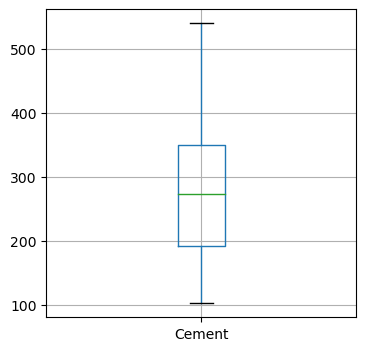

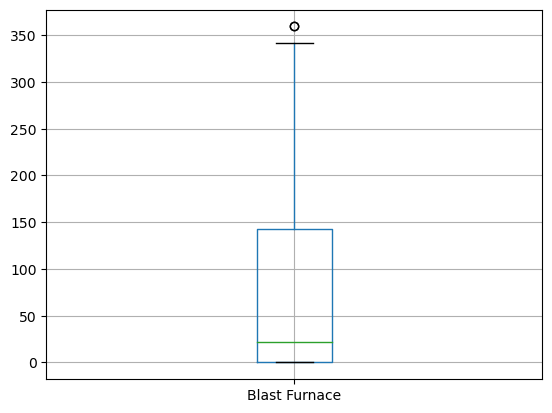

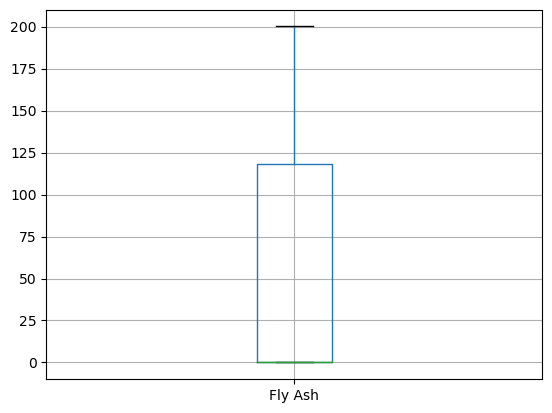

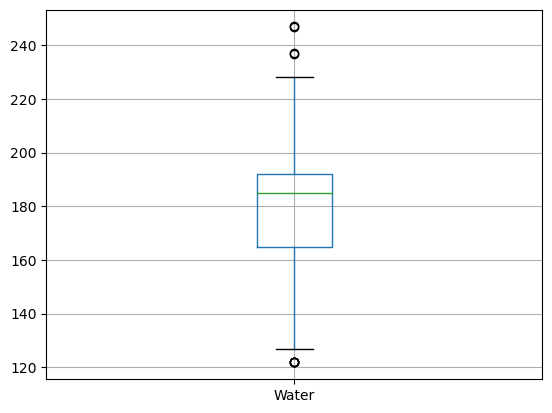

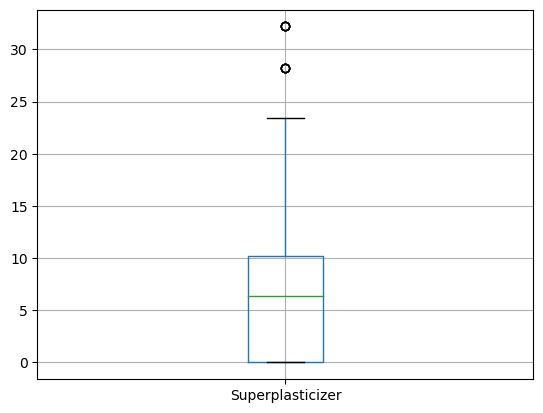

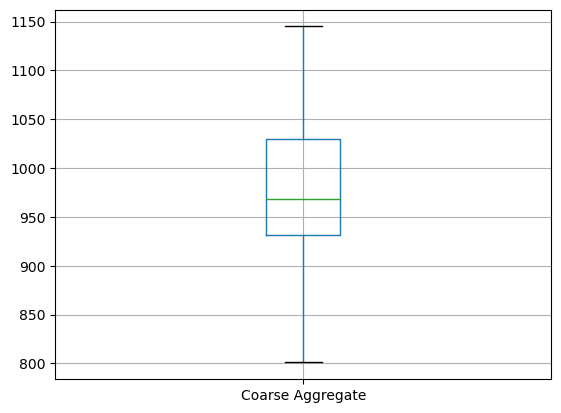

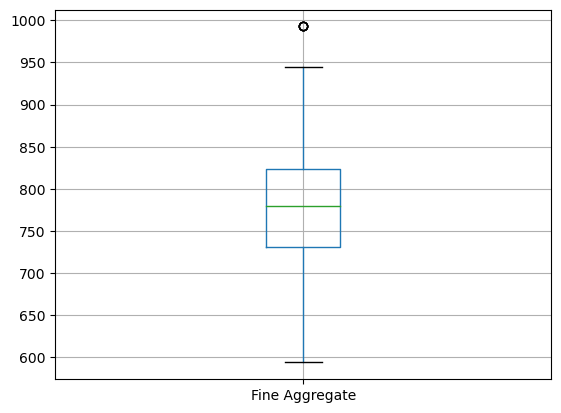

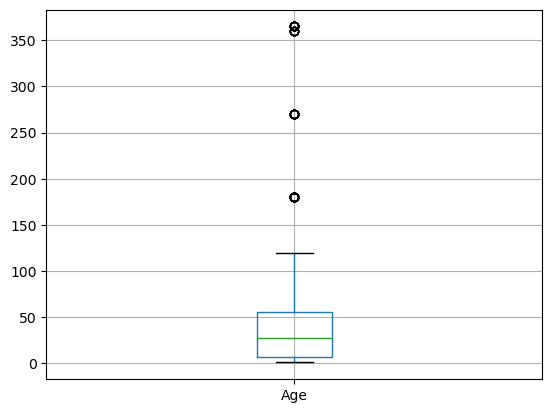

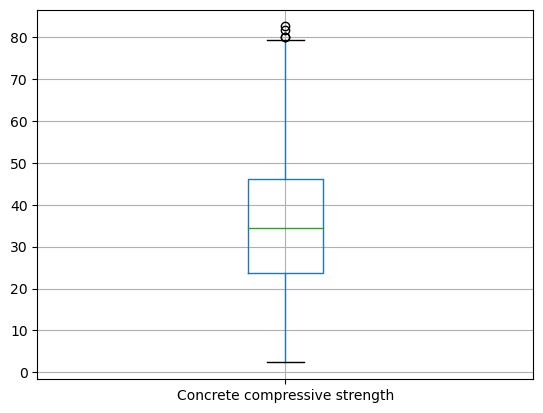

In [10]:
# Identifying the Outliers using Boxplot

plt.figure(figsize=(4,4))
for i in df.columns:
    df.boxplot(column=i)
    plt.show()
    
# We observe that there are outliers in the data. 

In [11]:
# Printing column names

df.columns

Index(['Cement', 'Blast Furnace', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

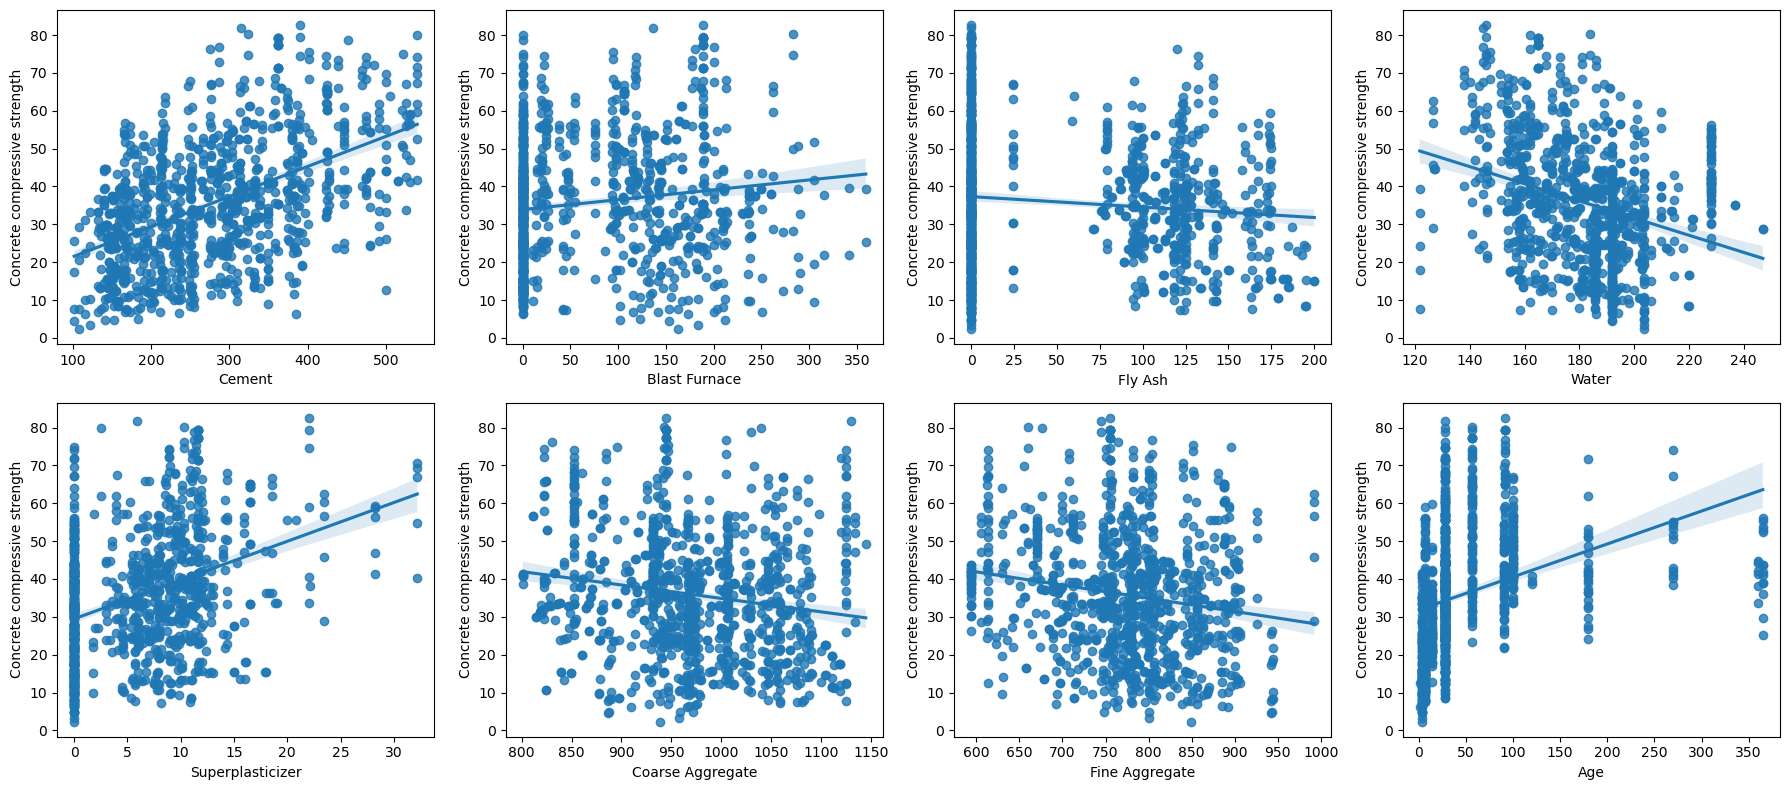

In [12]:
# Visualizing the linearity of the independent variables using Pairplot

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))
x_vars = ['Cement', 'Blast Furnace', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']
y_vars = ['Concrete compressive strength']
for i, ax in enumerate(axes.flatten()):
    if i < len(x_vars):
        sns.regplot(data=df, x=x_vars[i], y=y_vars[0], ax=ax)
        ax.set_xlabel(x_vars[i])
        ax.set_ylabel(y_vars[0])
plt.tight_layout()
plt.show()

In [13]:
# Removing the outliers using Inter Quartile Method and store the filterd data for future use

Q1=df.quantile(0.25)
Q2=df.quantile(0.5)
Q3=df.quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5
df_filtered = df[(df >= lower) & (df <= upper)].dropna()

In [14]:
df_filtered

# We see that we dropped 89 records (1030-941).

,Cement,Blast Furnace,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28.0,39.289790
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.768036


In [15]:
df_filtered.skew(axis=0,skipna=True)

# We confirm that no column shows a very high skewness now

Cement                           0.523660
Blast Furnace                    0.762201
Fly Ash                          0.420571
Water                            0.071723
Superplasticizer                 0.276328
Coarse Aggregate                -0.107653
Fine Aggregate                  -0.285505
Age                              1.241203
Concrete compressive strength    0.454156
dtype: float64

In [16]:
# Creating X(Independent) and Y(Dependent) variables

#import numpy as np

X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [17]:
X.head()

,Cement,Blast Furnace,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [18]:
Y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength, dtype: float64

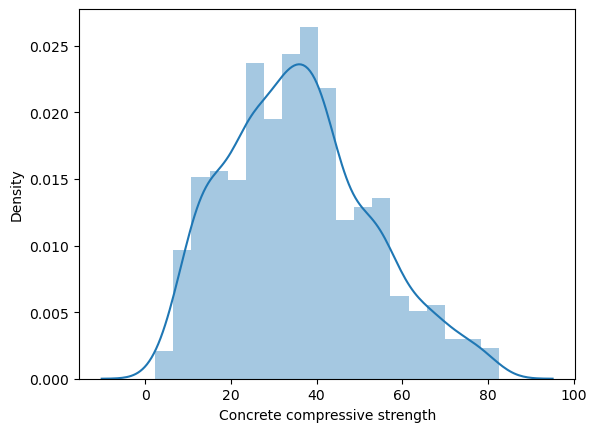

In [19]:
# Checking the normality in the dependent variable

sns.distplot(Y);

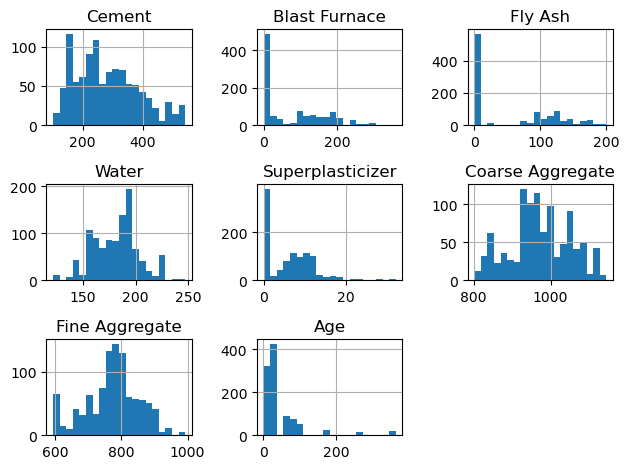

In [20]:
X.hist(bins=20)
plt.tight_layout()
plt.show()

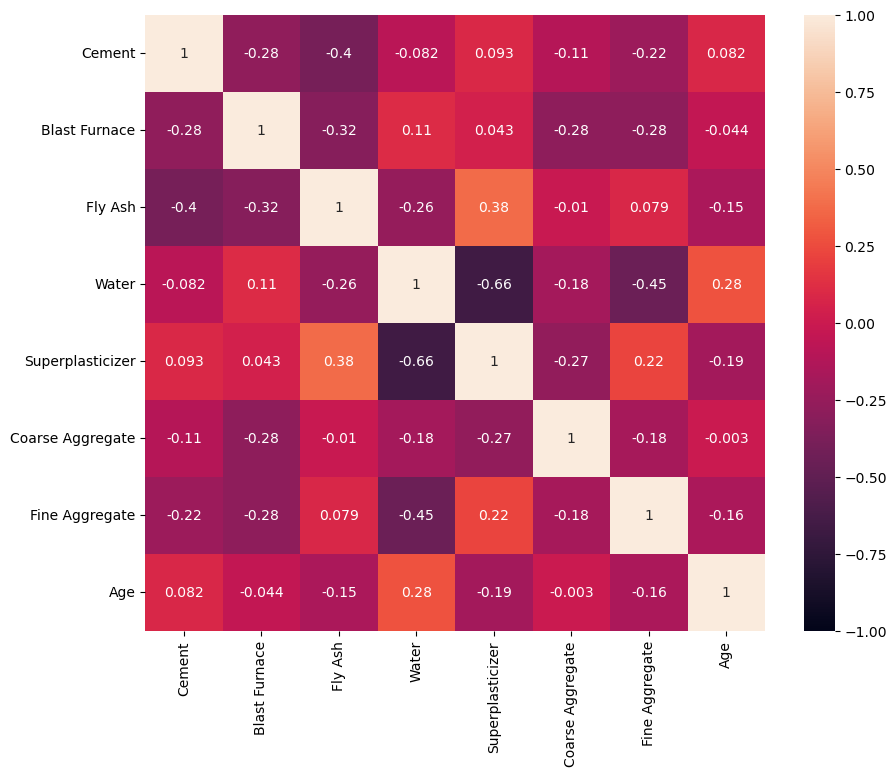

In [21]:
corr_df=X.corr(method="pearson")
#print(corr_df)
plt.figure(figsize=(10,8))
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show();

In [22]:
# Checking for the multi-collinearity in the dependent variables

#from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,Cement,15.47
1,Blast Furnace,3.33
2,Fly Ash,4.15
3,Water,82.15
4,Superplasticizer,5.47
5,Coarse Aggregate,84.96
6,Fine Aggregate,72.80
7,Age,1.70


In [23]:
# Since the VIF value in some columns is very high. Removing them will improve our model's accuracy

X.drop(["Water","Coarse Aggregate","Fine Aggregate"],axis=1,inplace =True)

# Re-Checking VIF and confirming it has dropped.

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,Cement,2.82
1,Blast Furnace,1.53
2,Fly Ash,1.88
3,Superplasticizer,2.92
4,Age,1.55


In [24]:
# Splitting the data into traing and testing

#from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [25]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)
print("Percentage of training data",X_train.shape[0]/X.shape[0]*100)

Shape of X_train: (824, 5)
Shape of Y_train: (824,)
Shape of X_test: (206, 5)
Shape of Y_test: (206,)
Percentage of training data 80.0


In [26]:
# Using the Base Linear Regression model

#from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,Y_train)

print("Intercept: ", lm.intercept_, "\n")
print("Coefficients: ", lm.coef_, "\n")
print("Zipped values:", list(zip(X.columns,lm.coef_)))

Intercept:  -11.231774639384284 

Coefficients:  [0.10258858 0.07406459 0.06151889 0.74785947 0.10104898] 

Zipped values: [('Cement', 0.10258857671287178), ('Blast Furnace', 0.07406458988318303), ('Fly Ash', 0.06151889067458913), ('Superplasticizer', 0.7478594656072415), ('Age', 0.10104898429111747)]


In [27]:
Y_predict=lm.predict(X_test)
# Y_predict

In [28]:
new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Actual Strength"]=Y_test
new_df["Predicted Strength"]=Y_predict
new_df=new_df.reset_index().drop("index", axis=1)
new_df

,Cement,Blast Furnace,Fly Ash,Superplasticizer,Age,Actual Strength,Predicted Strength
0,239.60,359.40,0.00,0.00,28,39.435269,42.796634
1,122.60,183.90,0.00,0.00,3,3.319827,15.269210
2,491.00,26.00,123.00,3.93,28,57.915984,54.400179
3,190.34,0.00,125.18,9.88,100,40.389504,33.489620
4,304.00,140.00,0.00,6.00,28,33.418902,37.640724
...,...,...,...,...,...,...,...
201,491.00,26.00,123.00,3.93,3,25.609109,51.873954
202,379.50,151.20,0.00,15.90,3,28.599464,51.093269
203,313.30,262.20,0.00,8.60,91,66.596487,55.956011
204,218.23,54.64,123.78,11.91,28,55.509713,34.554206


In [29]:
# Evaluating our model.

#from sklearn.metrics import r2_score,mean_squared_error
#import numpy as np

r2=r2_score(Y_test,Y_predict)
print("R-squared:",r2)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

rmse = np.sqrt(mean_squared_error(Y_test,Y_predict))
print("RMSE:", rmse)

# We notice that the R squared value is poor in the above model. Now we will tune our model

R-squared: 0.5731490051323049
Adj R-square: 0.5710647717589274
RMSE: 10.891371164130595


### Using the filtered data to build the Model

In [30]:
Xf = df_filtered.iloc[:,0:-1]
Yf = df_filtered.iloc[:,-1]
print("Shape of filtered X:", Xf.shape)
print("Shape of filtered Y:", Yf.shape)

Shape of filtered X: (941, 8)
Shape of filtered Y: (941,)


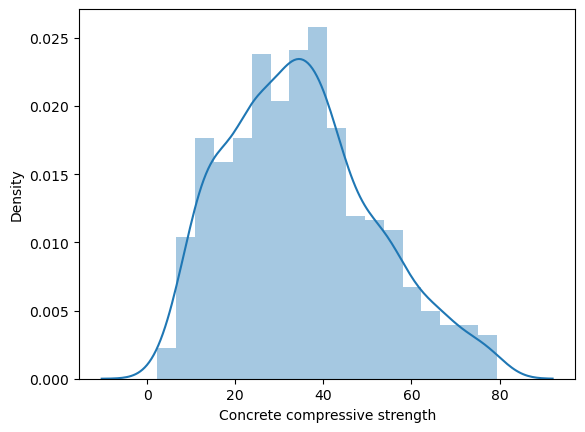

In [31]:
sns.distplot(Yf);

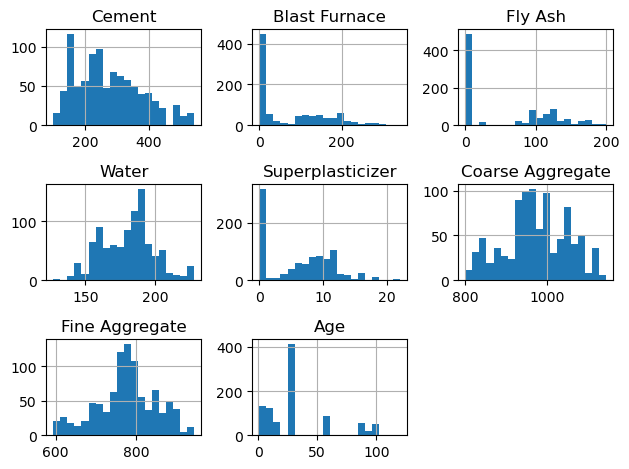

In [32]:
Xf.hist(bins=20)
plt.tight_layout()
plt.show()

In [33]:
# Checking skewness of our filtered data.
df_filtered.skew(axis=0,skipna=True)

Cement                           0.523660
Blast Furnace                    0.762201
Fly Ash                          0.420571
Water                            0.071723
Superplasticizer                 0.276328
Coarse Aggregate                -0.107653
Fine Aggregate                  -0.285505
Age                              1.241203
Concrete compressive strength    0.454156
dtype: float64

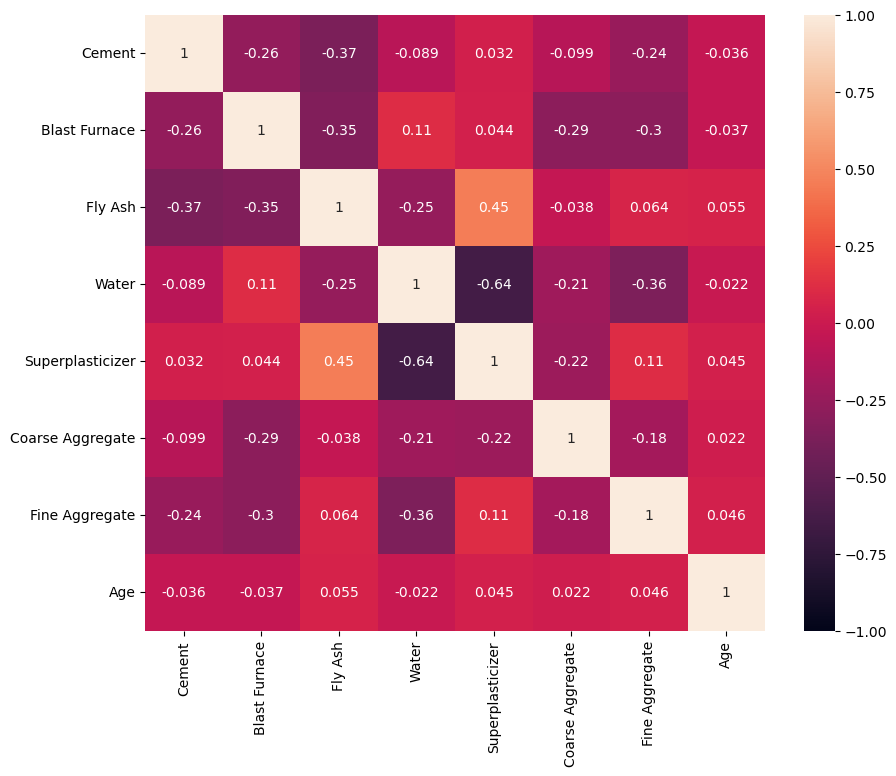

In [34]:
corr_df_filtered=Xf.corr(method="pearson")
#print(corr_df_filtered)
plt.figure(figsize=(10,8))
sns.heatmap(corr_df_filtered,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [35]:
# Dropping problamatic columns

Xf.drop(["Water","Coarse Aggregate","Fine Aggregate"],axis=1,inplace =True)

# Checking for skewness

#from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df_fil = pd.DataFrame()
vif_df_fil["features"] = Xf.columns
vif_df_fil["VIF Factor"] = [vif(Xf.values, i) for i in range(Xf.shape[1])]
vif_df_fil.round(2)

,features,VIF Factor
0,Cement,2.83
1,Blast Furnace,1.63
2,Fly Ash,2.41
3,Superplasticizer,3.54
4,Age,2.15


In [36]:
Xf

,Cement,Blast Furnace,Fly Ash,Superplasticizer,Age
1,540.0,0.0,0.0,2.5,28.0
5,266.0,114.0,0.0,0.0,90.0
7,380.0,95.0,0.0,0.0,28.0
8,266.0,114.0,0.0,0.0,28.0
9,475.0,0.0,0.0,0.0,28.0
...,...,...,...,...,...
1025,276.4,116.0,90.3,8.9,28.0
1026,322.2,0.0,115.6,10.4,28.0
1027,148.5,139.4,108.6,6.1,28.0
1028,159.1,186.7,0.0,11.3,28.0


In [37]:
# Spliting our filtered dataset into train and test data sets.

#from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Xf,Yf,test_size=0.2,random_state=10)

In [38]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)
print("Percentage of training data",X_train.shape[0]/X.shape[0]*100)

Shape of X_train: (752, 5)
Shape of Y_train: (752,)
Shape of X_test: (189, 5)
Shape of Y_test: (189,)
Percentage of training data 73.00970873786407


In [39]:
#from sklearn.linear_model import LinearRegression
lmf = LinearRegression()
lmf.fit(X_train,Y_train)
print("Intercept: ", lm.intercept_, "\n")
print("Coefficients: ", lm.coef_, "\n")
print("Zipped values:", list(zip(Xf.columns,lmf.coef_)))

Intercept:  -11.231774639384284 

Coefficients:  [0.10258858 0.07406459 0.06151889 0.74785947 0.10104898] 

Zipped values: [('Cement', 0.10786047112439025), ('Blast Furnace', 0.07484910152684188), ('Fly Ash', 0.051239251299308175), ('Superplasticizer', 0.777560681070446), ('Age', 0.3096601384025703)]


In [40]:
Yf_predict=lmf.predict(X_test)
#Yf_predict

In [41]:
#from sklearn.metrics import r2_score,mean_squared_error
#import numpy as np

rf2=r2_score(Y_test,Yf_predict)
print("R-squared:",rf2)

adjusted_rf_squared = 1 - (1-rf2)*(len(Yf)-1)/(len(Yf)-Xf.shape[1]-1)
print("Adj R-square:",adjusted_rf_squared)

rmse_f = np.sqrt(mean_squared_error(Y_test,Yf_predict))
print("RMSE:", rmse_f)

# We notice that the R squared value has increased significantly after removing the outliers

R-squared: 0.6982038347938246
Adj R-square: 0.696589951557428
RMSE: 9.066448531496254


In [42]:
newf_df=pd.DataFrame()
newf_df=X_test.copy()

newf_df["Actual Strength"]=Y_test
newf_df["Predicted Strength"]=Yf_predict
newf_df=newf_df.reset_index().drop("index", axis=1)

In [43]:
newf_df

,Cement,Blast Furnace,Fly Ash,Superplasticizer,Age,Actual Strength,Predicted Strength
0,147.80,175.1,0.00,2.200,28.0,26.922659,21.010920
1,214.90,53.8,121.89,9.610,28.0,52.200228,31.176439
2,491.00,26.0,123.00,3.930,56.0,61.855847,63.186725
3,393.00,0.0,0.00,0.000,3.0,19.105380,24.900093
4,297.16,0.0,117.54,9.520,28.0,47.401475,35.729288
...,...,...,...,...,...,...,...
184,385.00,0.0,0.00,0.000,14.0,27.923778,27.443471
185,194.68,0.0,100.52,7.480,14.0,24.986610,17.882189
186,491.00,26.0,123.00,3.930,3.0,25.609109,46.774737
187,326.00,0.0,138.00,11.000,28.0,40.679084,41.039129


### Regularization

In [44]:
# Using the Ridge Regression

#from sklearn.linear_model import Ridge
rm = Ridge(alpha=1.0)
rm.fit(X_train,Y_train)
print("Intercept: ", rm.intercept_, "\n")
print("Coefficients: ", rm.coef_, "\n")
print("Zipped values: \n", list(zip(Xf.columns,rm.coef_)))

Intercept:  -18.418374869068018 

Coefficients:  [0.10786181 0.07485059 0.05124288 0.77750349 0.3096599 ] 

Zipped values: 
 [('Cement', 0.10786181025129363), ('Blast Furnace', 0.07485059121524339), ('Fly Ash', 0.05124287851073305), ('Superplasticizer', 0.7775034908723856), ('Age', 0.30965990111440006)]


In [45]:
print("Zipped values: \n", list(zip(Xf.columns,rm.coef_)))

Zipped values: 
 [('Cement', 0.10786181025129363), ('Blast Furnace', 0.07485059121524339), ('Fly Ash', 0.05124287851073305), ('Superplasticizer', 0.7775034908723856), ('Age', 0.30965990111440006)]


In [46]:
Yf_ridge_predict=rm.predict(X_test)

In [47]:
newf_ridge_df=pd.DataFrame()
newf_ridge_df=X_test.copy()

newf_ridge_df["Actual Strength"]=Y_test
newf_ridge_df["Predicted Strength"]=Yf_ridge_predict
newf_ridge_df=newf_ridge_df.reset_index().drop("index", axis=1)

In [48]:
newf_ridge_df

,Cement,Blast Furnace,Fly Ash,Superplasticizer,Age,Actual Strength,Predicted Strength
0,147.80,175.1,0.00,2.200,28.0,26.922659,21.010924
1,214.90,53.8,121.89,9.610,28.0,52.200228,31.176370
2,491.00,26.0,123.00,3.930,56.0,61.855847,63.187307
3,393.00,0.0,0.00,0.000,3.0,19.105380,24.900296
4,297.16,0.0,117.54,9.520,28.0,47.401475,35.729239
...,...,...,...,...,...,...,...
184,385.00,0.0,0.00,0.000,14.0,27.923778,27.443661
185,194.68,0.0,100.52,7.480,14.0,24.986610,17.882061
186,491.00,26.0,123.00,3.930,3.0,25.609109,46.775332
187,326.00,0.0,138.00,11.000,28.0,40.679084,41.039108


In [49]:
rf_ridge_2=r2_score(Y_test,Yf_ridge_predict)
print("R-squared:",rf_ridge_2)

adjusted_rf_ridge= 1 - (1-rf_ridge_2)*(len(Yf)-1)/(len(Yf)-Xf.shape[1]-1)
print("Adj R-square:",adjusted_rf_ridge)

rmse_ridge = np.sqrt(mean_squared_error(Y_test,Yf_ridge_predict))
print("RMSE:", rmse_ridge)

R-squared: 0.6982028371860152
Adj R-square: 0.6965889486148173
RMSE: 9.066463516365891


In [50]:
#from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,Y_train)
print("Intercept: ", lasso.intercept_, "\n")
print("Coefficients: ", lasso.coef_, "\n")

Intercept:  -18.519791034232973 

Coefficients:  [0.10869444 0.07575634 0.05378118 0.72833198 0.30866594] 



In [51]:
Yf_lasso_predict=lasso.predict(X_test)

In [52]:
rf_lasso_2=r2_score(Y_test,Yf_lasso_predict)
print("R-squared:",rf_lasso_2)

adjusted_rf_lasso= 1 - (1-rf_lasso_2)*(len(Yf)-1)/(len(Yf)-Xf.shape[1]-1)
print("Adj R-square:",adjusted_rf_lasso)

rmse_lasso = np.sqrt(mean_squared_error(Y_test,Yf_lasso_predict))
print("RMSE:", rmse_lasso)

R-squared: 0.697316334198806
Adj R-square: 0.6956977049699227
RMSE: 9.079769727138153


### Metrics summary on our filtered data:
* Base Linear:
    * R-squared: 0.6982038347938246
    * Adj R-square: 0.696589951557428
    * RMSE: 9.066448531496254
* Ridge Model:
    * R-squared: 0.6982028371860152
    * Adj R-square: 0.6965889486148173
    * RMSE: 9.066463516365891
* Lasso Model:
    * R-squared: 0.697316334198806
    * Adj R-square: 0.6956977049699227
    * RMSE: 9.079769727138153
    
**Performance of Base Linear Model > Ridge Model > Lasso Model**

### We conclude that the Base Linear Regression model is the best model for the given data

In [65]:
new_df['Deviation'] = abs(new_df['Actual Strength']-new_df['Predicted Strength'])
new_df.head()

,Cement,Blast Furnace,Fly Ash,Superplasticizer,Age,Actual Strength,Predicted Strength,Deviation
0,239.60,359.4,0.00,0.00,28,39.435269,42.796634,3.361364
1,122.60,183.9,0.00,0.00,3,3.319827,15.269210,11.949383
2,491.00,26.0,123.00,3.93,28,57.915984,54.400179,3.515805
3,190.34,0.0,125.18,9.88,100,40.389504,33.489620,6.899884
4,304.00,140.0,0.00,6.00,28,33.418902,37.640724,4.221822


In [66]:
# Dumping our predicted test set values to an excel file.

new_df.to_csv('Predicted_concrete_strength.csv')

### End of Project